# **2. Exploring data**

---

## **2.1 Prerequisites**



**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
df = pd.read_csv('lichess_games.csv')
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


****

## **2.2 General tasks**

**How many rows and how many columns?**

In [3]:
rows, cols = df.shape
print(f'The dataset has {rows} rows and {cols} columns')

The dataset has 20058 rows and 16 columns


**What is the meaning of each row?**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


Each row in the dataset represents **a single chess game**. It contains detailed information about that game, such as its unique ID, players, moves, ratings, game result, and more

**Are there duplicated rows?**

In [6]:
print(f"Nums of duplicated row: {df.duplicated().sum()}")

Nums of duplicated row: 429


There are 429 duplicated rows, therefore we have to remove them for further preprocessing.

In [7]:
df.drop_duplicates(inplace=True)

**What is the meaning of each column?**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19629 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19629 non-null  object 
 1   rated           19629 non-null  bool   
 2   created_at      19629 non-null  float64
 3   last_move_at    19629 non-null  float64
 4   turns           19629 non-null  int64  
 5   victory_status  19629 non-null  object 
 6   winner          19629 non-null  object 
 7   increment_code  19629 non-null  object 
 8   white_id        19629 non-null  object 
 9   white_rating    19629 non-null  int64  
 10  black_id        19629 non-null  object 
 11  black_rating    19629 non-null  int64  
 12  moves           19629 non-null  object 
 13  opening_eco     19629 non-null  object 
 14  opening_name    19629 non-null  object 
 15  opening_ply     19629 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


- **id**: A unique identifier assigned to each game.
- **rated**: The game rate (TRUE, FALSE).
- **created_at**: The game's start time (milliseconds).
- **last_move_at**: The timestamp of the game’s final move (milliseconds).
- **turns**: The total number of moves.
- **victory_status**: How the game ended ("outoftime," "resign," "mate").
- **winner**: Who won the game ("white", "black").
- **increment_code**: The time control format, (eg. "14+7," meaning 14 minutes plus a 7-second increment per move).
- **white_id**: white player's unique identifier.
- **white_rating**: The chess rating of the white player.
- **black_id**: black player's unique identifier.
- **black_rating**: The chess rating of the black player.
- **moves**: A list of all moves made during the game.
- **opening_eco**: Encyclopedia of Chess Openings code for the opening played.
- **opening_name**: The name of the chess opening used in the game.
- **opening_ply**: The number of half-moves (plies) played during the opening phase.

In [9]:
df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,19629,19629,1.962900e+04,1.962900e+04,19629.000000,19629,19629,19629,19629,19629.000000,19629,19629.000000,19629,19629,19629,19629.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,oCvN8zWL,True,NaN,NaN,NaN,resign,white,10+0,ssf7,NaN,king5891,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,2,15817,NaN,NaN,NaN,10926,9792,7563,48,NaN,44,NaN,27,992,363,NaN
mean,NaN,NaN,1.483721e+12,1.483722e+12,60.458607,NaN,NaN,NaN,NaN,1596.090224,NaN,1588.324622,NaN,NaN,NaN,4.804422
std,NaN,NaN,2.809364e+10,2.809353e+10,33.502852,NaN,NaN,NaN,NaN,290.165038,NaN,290.164447,NaN,NaN,NaN,2.792791
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477530e+12,1.477530e+12,37.000000,NaN,NaN,NaN,NaN,1400.000000,NaN,1393.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.495830e+12,1.495830e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503107e+12,1.503110e+12,79.000000,NaN,NaN,NaN,NaN,1791.000000,NaN,1783.000000,NaN,NaN,NaN,6.000000


Moreover, we can see that there are duplicated **id** values. Since **id** indicates unique identifier for each game, we consider rows having the same **id** is duplicated games.

In [10]:
print(f"Nums of total id: {df['id'].count()}")
print(f"Nums of distinct id: {df['id'].nunique()}")

Nums of total id: 19629
Nums of distinct id: 19113


In [11]:
df.drop_duplicates("id",keep="first",inplace=True)

In [12]:
df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,19113,19113,1.911300e+04,1.911300e+04,19113.000000,19113,19113,19113,19113,19113.000000,19113,19113.000000,19113,19113,19113,19113.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,N8G2JHGG,True,NaN,NaN,NaN,resign,white,10+0,ssf7,NaN,docboss,NaN,e4 e5,A00,Sicilian Defense,NaN
freq,1,15467,NaN,NaN,NaN,10695,9545,7356,48,NaN,44,NaN,26,948,349,NaN
mean,NaN,NaN,1.483413e+12,1.483414e+12,60.513839,NaN,NaN,NaN,NaN,1597.300005,NaN,1590.045519,NaN,NaN,NaN,4.815780
std,NaN,NaN,2.833975e+10,2.833964e+10,33.488264,NaN,NaN,NaN,NaN,290.022740,NaN,290.441694,NaN,NaN,NaN,2.798283
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.476910e+12,1.476912e+12,37.000000,NaN,NaN,NaN,NaN,1401.000000,NaN,1394.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.495670e+12,1.495670e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1563.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503080e+12,1.503080e+12,79.000000,NaN,NaN,NaN,NaN,1792.000000,NaN,1785.000000,NaN,NaN,NaN,6.000000


**What is the current data type of each column? Are there columns having inappropriate data types?**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19113 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


Current data type of each columns seems to be appropriate

**With numerical columns, how are values distribute ?**

In [14]:
num_df = df.select_dtypes(include=['int64', 'float64'])

What is the percentage of missing values?

In [15]:
num_missing_percentage = (num_df.isna().sum() / len(df)) * 100
num_missing_percentage


created_at      0.0
last_move_at    0.0
turns           0.0
white_rating    0.0
black_rating    0.0
opening_ply     0.0
dtype: float64

There are no missing values in numeric attributes.

Min? max? Are they abnormal?

In [16]:
num_df.value_counts()

created_at    last_move_at  turns  white_rating  black_rating  opening_ply
1.499280e+12  1.499280e+12  34     1343          1328          4              2
1.376772e+12  1.376772e+12  43     1500          1219          6              1
1.376930e+12  1.376931e+12  27     1381          1575          10             1
1.376933e+12  1.376934e+12  84     1170          800           4              1
1.376946e+12  1.376947e+12  51     1348          1183          2              1
                                                                             ..
1.379366e+12  1.379367e+12  51     1354          1389          2              1
1.379370e+12  1.379370e+12  7      1023          879           3              1
1.379413e+12  1.379414e+12  56     1580          1402          3              1
1.379707e+12  1.379708e+12  108    1121          1458          2              1
1.504493e+12  1.504494e+12  65     1822          1767          11             1
Name: count, Length: 19112, dtype: int64

In [17]:
min_values = num_df.min()
max_values = num_df.max()

negative_values = (num_df.min() < 0)
zero_values = (num_df.min() == 0)

abnormalities_df = pd.DataFrame({
    'min_value': min_values,
    'max_value': max_values,
    'negative_values': negative_values,
    'zero_values': zero_values
})
abnormalities_df

,min_value,max_value,negative_values,zero_values
created_at,1.376772e+12,1.504493e+12,False,False
last_move_at,1.376772e+12,1.504494e+12,False,False
turns,1.000000e+00,3.490000e+02,False,False
white_rating,7.840000e+02,2.700000e+03,False,False
black_rating,7.890000e+02,2.723000e+03,False,False
opening_ply,1.000000e+00,2.800000e+01,False,False


Numeric attributes are normal.

Distribution

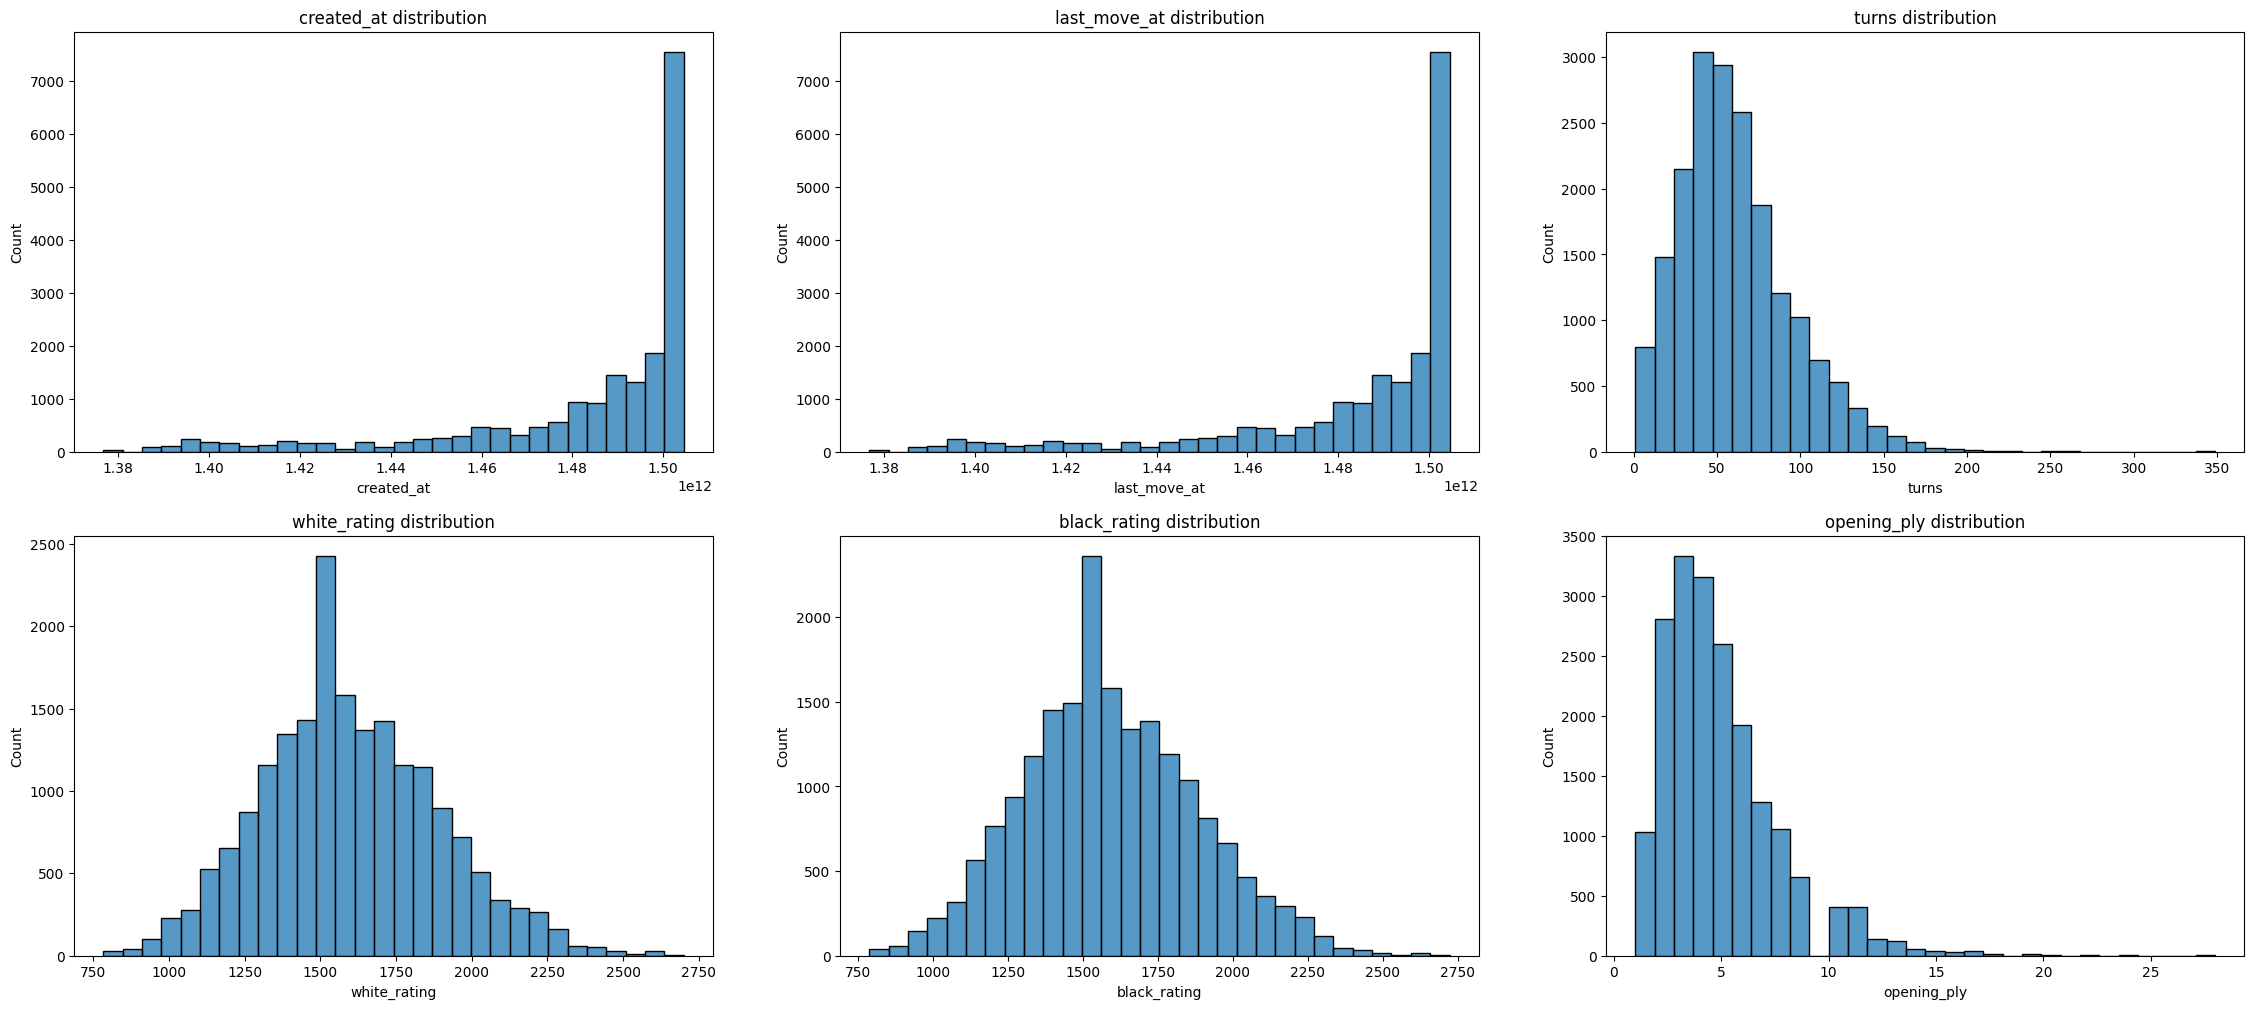

In [18]:

fig, ax = plt.subplots(2, 3, figsize=(28, 12))
ax = ax.flatten()

for i, col in enumerate(num_df.columns):
	sns.histplot(df[col], bins=30, ax=ax[i])
	ax[i].set_title(f'{col} distribution')

We can see that while **white_rating** and **black_rating** seem to have **normal distribution** (symmetric), **created_at** and **last_move_at** distributions **negatively skewed** (left-skewed). Moreover, **turns** and **opening_ply** distributions **positively skewed** (right-skewed).

**With each categorical column, how are values distributed?**

In [19]:
cate_df = df.select_dtypes(include=['object'])

What is the percentage of missing values?

In [20]:
cate_missing_percentage = (cate_df.isna().sum() / len(df)) * 100
cate_missing_percentage


id                0.0
victory_status    0.0
winner            0.0
increment_code    0.0
white_id          0.0
black_id          0.0
moves             0.0
opening_eco       0.0
opening_name      0.0
dtype: float64

There are no missing values in categorical attributes.

How many different values? Show a few

In [26]:
cate_df.nunique()

id                19113
victory_status        4
winner                3
increment_code      400
white_id           9438
black_id           9331
moves             18920
opening_eco         365
opening_name       1477
dtype: int64

In [32]:
unique_values_list = []
for cate in cate_df.columns:
    unique_values = cate_df[cate].unique()[:5]  
    unique_values_list.append([cate, unique_values])

unique_values_df = pd.DataFrame(unique_values_list, columns=['Column', 'Unique Values'])
unique_values_df

,Column,Unique Values
0,id,"[TZJHLljE, l1NXvwaE, mIICvQHh, kWKvrqYL, 9tXo1..."
1,victory_status,"[outoftime, resign, mate, draw]"
2,winner,"[white, black, draw]"
3,increment_code,"[15+2, 5+10, 20+0, 30+3, 10+0]"
4,white_id,"[bourgris, a-00, ischia, daniamurashov, nik221..."
5,black_id,"[a-00, skinnerua, adivanov2009, franklin14532,..."
6,moves,[d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba...
7,opening_eco,"[D10, B00, C20, D02, C41]"
8,opening_name,"[Slav Defense: Exchange Variation, Nimzowitsch..."


Are they abnormal?

Distribution of the victory status:

*victory_status*

Text(0.5, 1.0, 'Distribution of victory_Status')

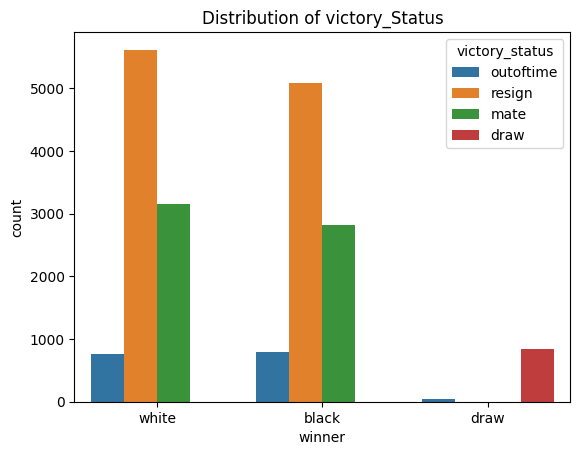

In [43]:
sns.countplot( x = 'winner', hue = 'victory_status', data = cate_df)
plt.title('Distribution of victory_Status')

*opening_name*

Text(0.5, 1.0, 'Top 10 most common opening_name')

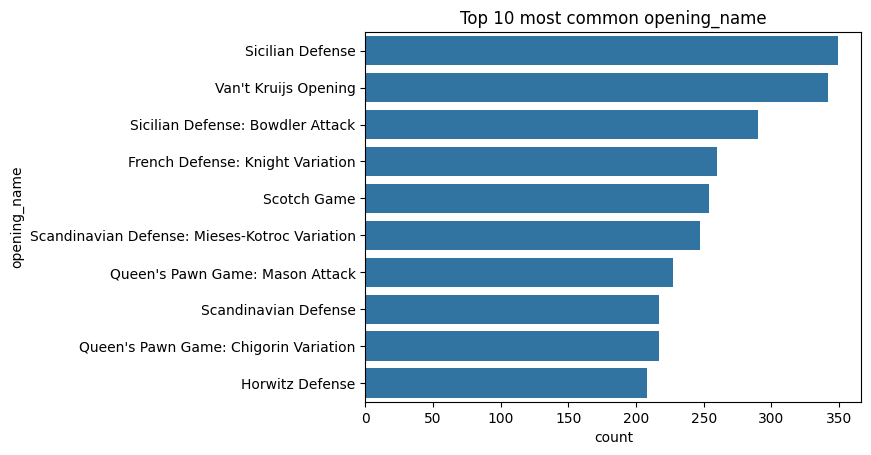

In [59]:
opening_name_counts = df['opening_name'].value_counts()
sns.barplot(x = opening_name_counts[:10], y = opening_name_counts[:10].index)
plt.title('Top 10 most common opening_name')

*opening_eco*

Text(0.5, 1.0, 'Top 10 most common opening_eco')

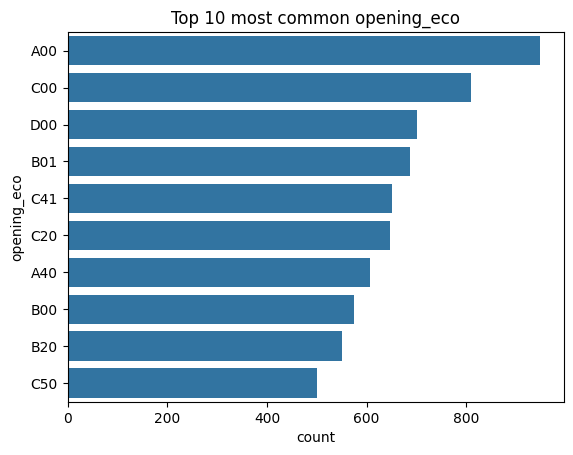

In [61]:
opening_eco_counts = df['opening_eco'].value_counts()
sns.barplot(x = opening_eco_counts[:10], y = opening_eco_counts[:10].index)
plt.title('Top 10 most common opening_eco')

*increment_code*	

Text(0.5, 1.0, 'Top 10 most common increment_code')

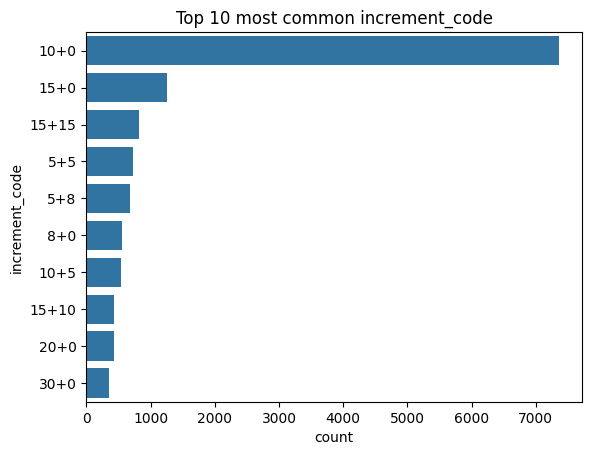

In [62]:
incre_code_counts = df['increment_code'].value_counts()
sns.barplot(x = incre_code_counts[:10], y = incre_code_counts[:10].index)
plt.title('Top 10 most common increment_code')

*white_id*

Text(0.5, 1.0, 'Top 10 most common white_id')

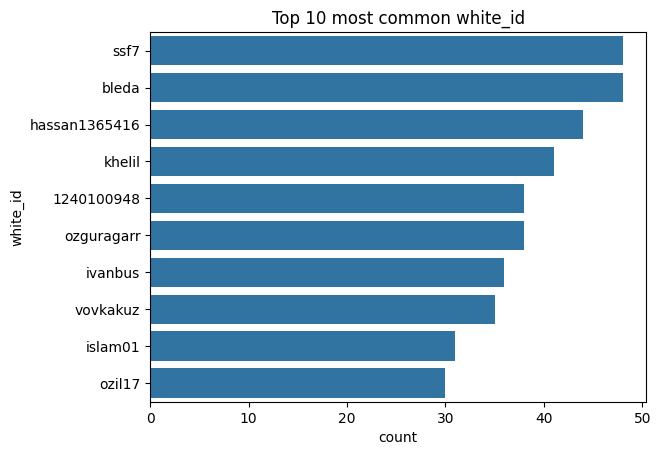

In [63]:
white_id_counts = df['white_id'].value_counts()
sns.barplot(x = white_id_counts[:10], y = white_id_counts[:10].index)
plt.title('Top 10 most common white_id')

*black_id*

Text(0.5, 1.0, 'Top 10 most common black_id')

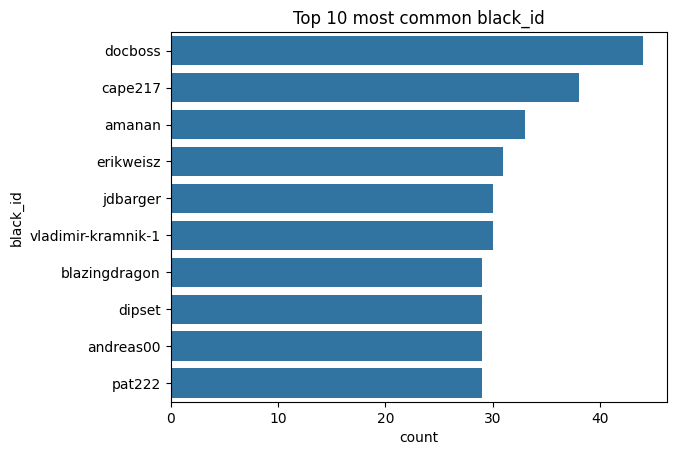

In [64]:
black_id_counts = df['black_id'].value_counts()
sns.barplot(x = black_id_counts[:10], y = black_id_counts[:10].index)
plt.title('Top 10 most common black_id')

*moves*	

Text(0.5, 1.0, 'Top 10 most common moves')

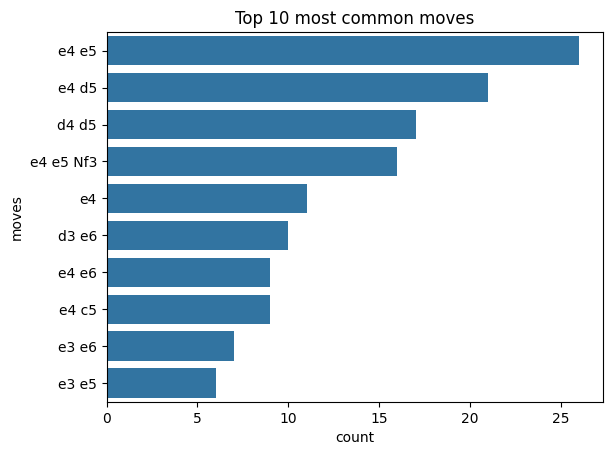

In [65]:
moves_counts = df['moves'].value_counts()
sns.barplot(x = moves_counts[:10], y = moves_counts[:10].index)
plt.title('Top 10 most common moves')